## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [80]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [81]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [82]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [83]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [84]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [85]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [86]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [87]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


nan

In [88]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [89]:
z = np.linspace(-10, 10, 101)

In [90]:
probabilities = sigmoid(z)

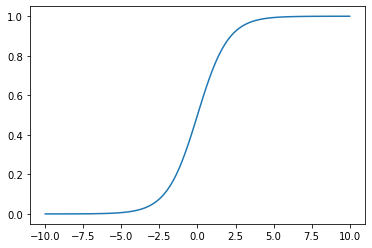

In [91]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [92]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [93]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


In [94]:
print(X_st)

[[ 1.          1.         -0.97958969  1.        ]
 [ 1.          1.         -0.56713087  1.        ]
 [ 1.          2.         -0.46401617  2.        ]
 [ 1.          5.         -0.77336028  1.        ]
 [ 1.          3.          0.97958969  2.        ]
 [ 1.          0.         -0.36090146  1.        ]
 [ 1.          5.          1.08270439  3.        ]
 [ 1.         10.          2.11385144  3.        ]
 [ 1.          1.         -1.08270439  1.        ]
 [ 1.          2.          0.05155735  2.        ]]


## Домашнее задание <a class='anchor' id='hw'>

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [95]:
def calc_logloss_mod(y, y_pred):
    err = - np.mean(y*np.log(y_pred + 1e-16) + (1.0 - y)*np.log(1.0 - y_pred + 1e-16))
    return np.sum(err)

In [96]:
print(f'Check with zeros: {calc_logloss_mod(np.array([0, 0]), np.array([0.0, 0.0]))}')
print(f'calc_logloss: {calc_logloss(y1, y_pred1)}, calc_logloss_mod: {calc_logloss_mod(y1, y_pred1)}')

Check with zeros: 0.0
calc_logloss: nan, calc_logloss_mod: 0.05268025782891308


C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [98]:
def logreg_eval_model_mod(X, y, iterations, alpha=1e-4, verbose=False):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if verbose:
            if i % (iterations/10) == 0 :
                print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W, err

def optimize(func, X, y, iter_list, alpha_list):
    d = {}
    for iteration in iter_list:
        for alpha in alpha_list:
            W, err = func(X, y, iterations=iteration, alpha=alpha)
            d[(iteration, alpha)] = err
    result = sorted(d.items(), key=lambda x: x[1])[0]
    best_iter, best_alpha = result[0]
    best_err = result[1]
    return best_iter, best_alpha, best_err

In [100]:
best_iter, best_alpha, best_err = optimize(logreg_eval_model_mod, np.transpose(X_st), y, np.arange(100, 2001, 100), np.array([0.0001, 0.001, 0.01, 0.1]))

print(f'best num of iterations: {best_iter}, best alpha: {best_alpha}, log_loss: {best_err}')

best num of iterations: 2000, best alpha: 0.1, log_loss: 0.3145853199959253


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [101]:
def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred_proba

In [102]:
W, err = logreg_eval_model_mod(X_st, y, iterations=best_iter, alpha=best_alpha)

y_pred_proba = calc_pred_proba(W, X_st)

print(y_pred_proba)

[0.32651845 0.28501003 0.93478173 0.00799139 0.72661214 0.4955621
 0.97234601 0.12687588 0.33737109 0.91817918]


4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [103]:
def calc_pred(W, X, threshold=0.5):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.array([1 if proba >= threshold else 0 for proba in y_pred_proba], dtype = np.float64)
    return y_pred

In [104]:
W, err = logreg_eval_model_mod(X_st, y, iterations=best_iter, alpha=best_alpha)

y_pred = calc_pred(W, X_st)

print(y_pred)

[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]


5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [106]:
def custom_accuracy_score(y, y_pred):
    return np.sum(y == y_pred) / len(y)

def custom_confusion_matrix(y, y_pred):
    tp, fp, fn, tn = 0, 0, 0, 0
    for i, j in zip(y_pred, y):
        if i == 1:
            if j == 1:
                tp += 1
            else:
                fp += 1
        else:
            if j == 1:
                fn += 1
            else:
                tn += 1
    return np.array([[tp, fp], [fn, tn]])
    
def custom_precision_score(y, y_pred):
    cm = custom_confusion_matrix(y, y_pred)
    tp, fp = cm[0]
    return tp / (tp + fp)

def custom_recall_score(y, y_pred):
    cm = custom_confusion_matrix(y, y_pred)
    tp, fp = cm[0]
    fn, tn = cm[1]
    return tp / (tp + fn)

def custom_f1_score(y, y_pred):
    prc = custom_precision_score(y, y_pred)
    rec = custom_recall_score(y, y_pred)
    return 2 * prc * rec / (prc + rec)

In [107]:
W, err = logreg_eval_model_mod(X_st, y, iterations=100, alpha=0.1)

y_pred = calc_pred(W, X_st)

custom_acc = custom_accuracy_score(y, y_pred)
custom_cm = custom_confusion_matrix(y, y_pred)
custom_prc = custom_precision_score(y, y_pred)
custom_rec = custom_recall_score(y, y_pred)
custom_f1 = custom_f1_score(y, y_pred)

sklearn_acc = accuracy_score(y, y_pred)
sklearn_cm = confusion_matrix(y, y_pred)
sklearn_prc = precision_score(y, y_pred)
sklearn_rec = recall_score(y, y_pred)
sklearn_f1 = f1_score(y, y_pred)

print(f'Custom Metrics:\n\
    Accuracy: {custom_acc},\n\
    Confusion Matrix: {custom_cm},\n\
    Precision: {custom_prc},\n\
    Recall: {custom_rec},\n\
    F1: {custom_f1}\n')

print(f'Sklearn Metrics:\n\
    Accuracy: {sklearn_acc},\n\
    Confusion Matrix: {sklearn_cm},\n\
    Precision: {sklearn_prc},\n\
    Recall: {sklearn_rec},\n\
    F1 (sklearn): {sklearn_f1}\n')

Custom Metrics:
    Accuracy: 0.9,
    Confusion Matrix: [[5 1]
 [0 4]],
    Precision: 0.8333333333333334,
    Recall: 1.0,
    F1: 0.9090909090909091

Sklearn Metrics:
    Accuracy: 0.9,
    Confusion Matrix: [[4 1]
 [0 5]],
    Precision: 0.8333333333333334,
    Recall: 1.0,
    F1 (sklearn): 0.9090909090909091



6. Могла ли модель переобучиться? Почему?

Модель могла переобучиться из-за слишком большого числа итераций алгоритма градиентный спуск, для предотвращения переобучения следует разбить данные на train/test (80/20 или 70/30) и использовать кросс-валидацию для оценки качества обобщающей способности модели.

Проект: 
1. https://www.kaggle.com/c/regression-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/classification-choose-tutors классификация

## Дополнительные материалы

1. [Функции потерь для классификации](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

2. Метод максимального правдоподобия: [Сложное описание](https://habr.com/ru/company/ods/blog/323890/#metod-maksimalnogo-pravdopodobiya) / [Простое описание](https://www.youtube.com/watch?v=2iRIqkm1mug)

3. [Встроенные датасеты Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

4. Площаль под кривой [numpy.trapz](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.trapz.html)


##  Summary

* Логистическая регрессия - частный случай линейной классификации - предсказывает вероятность отнесения объекта к основному классу, что зачастую очень важно при интерпретации
* Для "отображения" действительных предсказаний линейной модели в "вероятностный" интервал [0,1] применяют сигмоиду
* Для обучения логистической регрессии используют логарифмическую функцию потерь (log-loss), полученную методом максимального правдоподобия (maximum likelihood estimation)
* Оптимизируем log-loss классическим градиентным спуском, в котором берем градиент log-loss'а
* Основными метриками качества классификатора являются Accuracy, Precision, Recall, ROC-AUC, PR-AUC, F-мера
* Нужно быть внимательным при работе с этими метриками и хорошо понимать, как они работают и как между собой связаны, иначе выводы могут получиться неверными

### Опеределения
*Масштабирование данных*

**Классификация** — задача, в которой имеется множество объектов, разделённых некоторым образом на классы.

**Линейный классификатор** — алгоритм классификации, основанный на построении линейной разделяющей поверхности.

**Отступ (для классификатора)** — эвристика, оценивающая то, насколько объект принадлежит классу, насколько эталонным представителем он является.
____________
_Логистическая регрессия_

**Логистическая регрессия** — метод построения линейного классификатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.

**Риск** – отношение вероятности «положительный эффект» к вероятности «отрицательный эффект».

**Логит** – натуральный логарифм отношения вероятности «положительный эффект» к вероятности «отрицательный эффект».
____________
_Метрики качества классификации_

**Accuracy** – доля правильных ответов.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

**Точность (precision)** – долю истинных срабатываний от общего количества срабатываний.

$$precision(a, X) = \frac{TP}{TP+FP}.$$

**Полнота (recall)** – доля объектов, истинно относящихся к выбранному классу, которые алгоритм отнес к этому классу.

$$recall(a, X) = \frac{TP}{TP+FN},$$

**F-мера** – среднее гармоническое между точностью и полнотой.

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

**ROC-кривая** (receiver operating characteristic) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (TPR), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (FPR) при варьировании порога решающего правила.

**PR-кривая** — график, позволяющий оценить качество бинарной классификации, отображает соотношение между Precision и Recall.